##CBOW

In [1]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import brown

In [4]:
nltk.download('brown')
data = brown.sents() # Use the brown corpus from nltk as sample data

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Model

In [6]:
model = Word2Vec(data, min_count=1, vector_size=100, window=5, sg=0)

Train

In [8]:
model.train(data, total_examples=len(data), epochs=5)

(4270387, 5805960)

Word Embedding

In [9]:
word_vectors = model.wv

Cosine similarity

In [10]:
similarity = word_vectors.similarity('woman', 'man')
print(f"Similarity between 'woman' and 'man': {similarity}")

Similarity between 'woman' and 'man': 0.5793176889419556


Visualize

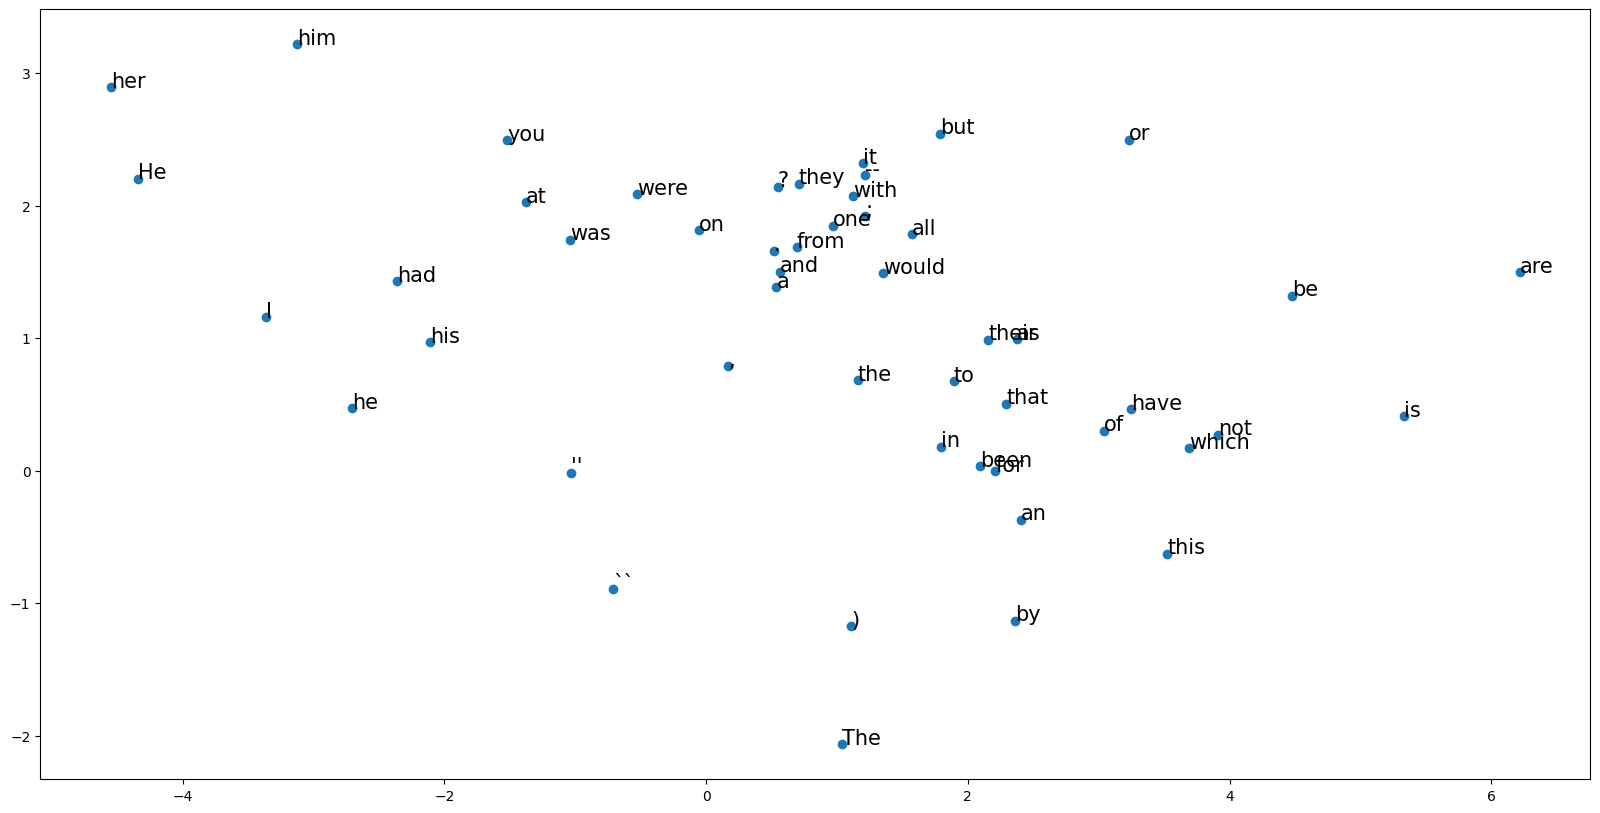

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

fig = plt.figure(figsize=(20,10))

plt.scatter(result[:50, 0], result[:50, 1])
words = list(model.wv.index_to_key)[:50]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=15)
plt.show()


VD2

In [19]:
from gensim.models import Word2Vec

# Dữ liệu ví dụ
sentences = [['I', 'love', 'cat'],
             ['I', 'love', 'dog'],
             ['I', 'love', 'animal']]

# Xây dựng mô hình CBOW
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=0) # sg = 0 sdung cbow

# In vector embedding cho từ 'learning'
model.train(sentences, total_examples=len(data), epochs=5)

word_vec=model.wv

In [21]:
print(word_vec['love'])

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

##Skip-grams

In [29]:
import nltk
nltk.download('punkt')
import tensorflow as tf
from nltk.corpus import gutenberg
from string import punctuation
# import tf.keras
from keras.preprocessing import text

# download and load the bible text from gutenberg
nltk.download('gutenberg')
bible_text = gutenberg.sents('bible-kjv.txt')

# remove punctuation and numbers from the text
remove_chars = punctuation + '0123456789'
normalized_bible = [[word.lower() for word in sent if word not in remove_chars] for sent in bible_text]

# join the tokens back into a string
normalized_bible_text = [' '.join(tok_sent) for tok_sent in normalized_bible]

# remove empty strings and lines with fewer than three words
filtered_bible_text = list(filter(None, normalized_bible_text))
filtered_bible_text = [tok_sent for tok_sent in filtered_bible_text if len(tok_sent.split()) > 2]

print('Total number of lines in the original corpus:', len(bible_text))
print('\nOriginal sample line:', bible_text[5])
print('\nProcessed sample line:', filtered_bible_text[5])

# create a tokenizer and fit it on the text
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(filtered_bible_text)

# create mapping dictionaries for words to ids and ids to words
word_to_id = tokenizer.word_index
id_to_word = {v:k for k, v in word_to_id.items()}

# calculate the vocabulary size
vocab_size = len(word_to_id) + 1
embedding_size = 100

# convert the text to a list of word ids
word_ids = [[word_to_id[w] for w in text.text_to_word_sequence(doc)] for doc in filtered_bible_text]
print('Vocabulary size:', vocab_size)
print('Vocabulary sample:', list(word_to_id.items())[:10])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Total number of lines in the original corpus: 30103

Original sample line: ['And', 'the', 'Spirit', 'of', 'God', 'moved', 'upon', 'the', 'face', 'of', 'the', 'waters', '.']

Processed sample line: and the spirit of god moved upon the face of the waters
Vocabulary size: 12726
Vocabulary sample: [('the', 1), ('and', 2), ('of', 3), ('to', 4), ('that', 5), ('in', 6), ('he', 7), ('shall', 8), ('unto', 9), ('for', 10)]


In [30]:
# generate skip-grams
skip_grams = [tf.keras.preprocessing.sequence.skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in word_ids]
# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id_to_word[pairs[i][0]], pairs[i][0],
          id_to_word[pairs[i][1]], pairs[i][1],
          labels[i]))

(bible (6037), communing (7074)) -> 0
(james (1323), govern (6466)) -> 0
(bible (6037), ethnan (9943)) -> 0
(king (50), moveth (3898)) -> 0
(the (1), james (1323)) -> 1
(the (1), ostrich (10676)) -> 0
(king (50), feet (370)) -> 0
(king (50), james (1323)) -> 1
(james (1323), the (1)) -> 1
(bible (6037), the (1)) -> 1


In [31]:
from tensorflow.keras.layers import Concatenate, Dense, Embedding, Reshape
from tensorflow.keras.models import Model

# Define the input layers for the target and context words
target_word_input = tf.keras.Input(shape=(1,))
context_word_input = tf.keras.Input(shape=(1,))

# Build skip-gram architecture
target_word_model = Embedding(vocab_size, embedding_size,
                              embeddings_initializer="glorot_uniform")(target_word_input)
target_word_model = Reshape((embedding_size,))(target_word_model)

context_word_model = Embedding(vocab_size, embedding_size,
                               embeddings_initializer="glorot_uniform")(context_word_input)
context_word_model = Reshape((embedding_size,))(context_word_model)

# Concatenate the output of the target and context models
merged = Concatenate(axis=1)([target_word_model, context_word_model])

# Add a dense layer and sigmoid activation
output = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(merged)

# Define the model
model = Model(inputs=[target_word_input, context_word_input], outputs=output)

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# View model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       1272600     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       1272600     ['input_2[0][0]']                
                                                                                              

In [32]:
# train the model on the skip-grams
for epoch in range(1, 6):
    total_loss = 0
    for i, elem in enumerate(skip_grams):
        skip_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        skip_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [skip_first_elem, skip_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed {} skip-gram pairs'.format(i))
        total_loss += model.train_on_batch(X,Y)

    print('Epoch: {} Loss: {}'.format(epoch, total_loss))

Processed 0 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 20000 skip-gram pairs
Epoch: 1 Loss: 2119.2297586582717
Processed 0 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 20000 skip-gram pairs
Epoch: 2 Loss: 1915.5734186108602
Processed 0 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 20000 skip-gram pairs
Epoch: 3 Loss: 1815.4531472506787
Processed 0 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 20000 skip-gram pairs
Epoch: 4 Loss: 1770.6287333405635
Processed 0 skip-gram pairs
Processed 10000 skip-gram pairs
Processed 20000 skip-gram pairs
Epoch: 5 Loss: 1743.0543370878659


In [33]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

# get the embeddings for the words in the vocabulary
weights = model.layers[2].get_weights()[0]

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1]
                   for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

print(similar_words)

# reduce the dimensions of the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(weights)

# create a list of the words in the vocabulary
words = [id2word[i] for i in range(1, vocab_size)]

# plot the similar words
fig, ax = plt.subplots(figsize=(20,10))
for word in similar_words:
    ax.scatter(vectors_2d[word2id[word]-1, 0], vectors_2d[word2id[word]-1, 1], c='red', label=word)
    for sim_word in similar_words[word]:
        ax.scatter(vectors_2d[word2id[sim_word]-1, 0], vectors_2d[word2id[sim_word]-1, 1], c='blue')
        ax.annotate(sim_word, (vectors_2d[word2id[sim_word]-1, 0], vectors_2d[word2id[sim_word]-1, 1]))
ax.legend()
plt.show()

(12726, 12726)


NameError: ignored